# The dynamic malthus model

# Model description

In this project we solve the dynamic malthusian model. The model is from the course "Economic History" here at KU and it models preindustrial malthusian growth. In this model the parameters as defined as: \
$Y$ is production \
$L$ is labor/population \
$A$ is technology \
$X$ is land, which is constant, a core mechanism \
$n$ is population growthrate \
$\eta$ is how much fertility is correlated with income\
$\mu$ is the mortality rate


The model is defined by the three equations below, where 1. describe how output is a function of labor technology and land, where both land and technology is constant, a core assumption. Equation 2 describes how the population growthrate is positively correlated with income, by the parameter $\eta$, another essenttial assumption. Equation 3 describes how population in the next period is given by the growthrate and the mortality rate. The model is describing how improvements in technology or other factors which would normaly give higher income pr capita will only give higher population as there are fixed amount of land. 

1) $ Y_t = L_t^{1-\alpha}(AX)^\alpha $ 
2) $n_t=\eta y_t \\$
3) $L_{t-1}=n_tL_t +(1-\mu)L_t$

In the analytical solution set $\mu$ equal to 1 as the model will otherwise be to difficult to solve analytically, this means that people only live for 1 period at a time. (This was also what we did in the course when working with the model). When expanding the model we will thereby solve it nummerically by using the equations above, instead of the rewriten version we use below. \
Eq. 3.1 $L_{t-1}=n_tL_t$

Import set and magics

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

## Analytical solution

In this model the two variables of income and population are the main components. In the analytical part we therefore start by solving the model for populaion and then for income. We firstly write of the model and the needed equations and then we begin substituting the different expressions to find the transition equation for population.
The equation is printed below and shows a nice equation following the INADA conditions.

In [2]:
# Define symbols
y_t_1, y_t, Y_t_1, Y_t, L_t, L_t_1, A, X, alpha, eta, n_t, mu = sm.symbols('y_t_1 y_t Y_t_1 Y_t L_t L_t_1 A X alpha eta n_t mu')

# Define equations
equation1 = sm.Eq(Y_t, L_t**(1-alpha) * (A*X)**alpha)  # First equation
equation2 = sm.Eq(n_t, eta * y_t)                      # Second equation
equation3 = sm.Eq(L_t_1, n_t*L_t )                     # Third equation
equation_y = sm.Eq(y_t, Y_t/L_t)                       # Income per person equation


n_t_expr = sm.solve(equation2, n_t)[0] # Solve equation2 for n_t
equation3_substituted = equation3.subs(n_t, n_t_expr) #We substitute the second eqution into the third
equation3_substituted_y = equation3_substituted.subs(y_t, equation_y.rhs)  #We substitute equation for small y into it 
equation3_final = equation3_substituted_y.subs(Y_t, equation1.rhs) #We substitute equation for big Y into it 
equation3_final

Eq(L_t_1, L_t**(1 - alpha)*eta*(A*X)**alpha)

We then use sympy to solve the equation for the steady state value of the population as shown below.

In [3]:
# Change L_t_1 to L_t
equation3_final = equation3_final.subs(L_t_1, L_t)

# Solve the equation for L_t
L_steady_state = sm.solve(equation3_final, L_t)[0]
L_steady_state

(eta*(A*X)**alpha)**(1/alpha)

When looking at income per person, the model can also be solve but as showed above we face problems with exponents in sympy. Why we will show how to get to the transition equation for income for capita. The Analytical solution to the evolution of income pr capita is hence given as: \
$y_{t+1}=\eta^{-\alpha} y_t^{1-\alpha}$ \
We then find the steady state using sympy

In [4]:

# Define the equation
eq = sm.Eq(y_t_1, eta**(-alpha) * y_t**(1-alpha))

# Set y_{t+1} = y_t
eq_substituted = eq.subs(y_t_1, y_t)

# Solve for y_t
solution_y_t = sm.solve(eq_substituted, y_t)
solution_y_t[0]

(eta**(-alpha))**(1/alpha)

In [5]:
simple_solution = sm.simplify(solution_y_t[0])
simple_solution

(eta**(-alpha))**(1/alpha)

As show above with great difficulty by sympy, the solution of the steady state is $y* =\frac{1}{\eta}$

## Numerical solution

We now look at the nummerical solution to the estimation of steady state population. As the equations are all nice and follow the INADA conditions we dont foresee any problems finding the steady states nummerically. 
We begin be choosing the parameter estiamtes and then we solve it.

In [6]:
# Constants
alpha = 0.5    # Output elasticity with respect to labor
eta = 0.5     # Adjusted responsiveness of population growth to output (lowered to stabilize)
A = 1          # Technology level
X = 1          # Land availability
L = 10       # Initial population

# Simulation settings
max_iterations = 5000  # maximum iterations
tolerance = 1e-4       # Adjusted tolerance for practicality
previous_population = L

# Iterate to find steady state
for iteration in range(max_iterations):
    # Calculate output pr person
    y = (L ** (- alpha)) * ((A * X) ** alpha)
    # Calculate new population based on the output
    n = eta * y
    L_new = n * L
    
    # Print dynamics to understand behavior
    if iteration % 1000 == 0:  # Print every 1000 iterations to monitor progress
        print(f"Iteration {iteration}: Population = {L_new}")
    
    # Check for convergence
    if np.abs(L_new - previous_population) < tolerance:
        print(f"Steady state reached at iteration {iteration}")
        print(f"Steady state population: {L_new}")
        break
    
    # Update the population for the next iteration
    previous_population = L
    L = L_new

# If loop completes without breaking
if iteration == max_iterations - 1:
    print("Steady state not reached within the maximum number of iterations.")



Iteration 0: Population = 1.5811388300841898
Steady state reached at iteration 14
Steady state population: 0.2500281455009532


In [7]:
print(0.5**(1/0.5)) #printing the steady state population from the analytical solution

0.25


Above we found the steady state population which was found after 15 iterations to be within our error. We also calculated the analytic steady state above for the same values, and we can see that they match.

# Further analysis

In the further analysis we investigate how the parameters $\alpha$ and $\eta$ affect the steady state population, and the interplay between these two variables.
We do this be creating a 3d plot of both the varaibles, and then we look at them individually.

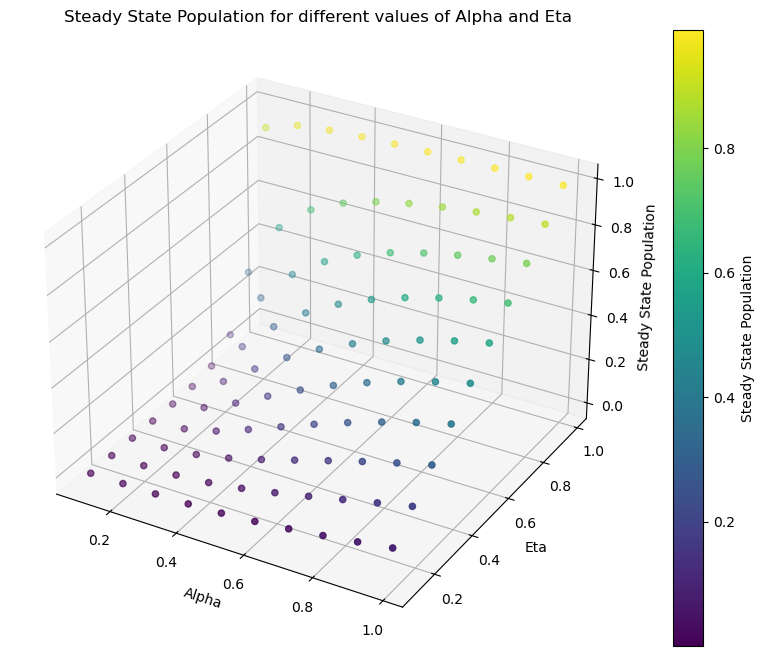

In [8]:
# Parameter ranges
alpha_values = np.linspace(0.1, 0.99, 10)
eta_values = np.linspace(0.1, 0.99, 10)
L_initial = 10
steady_states = []

for alpha in alpha_values:
    for eta in eta_values:
        L = L_initial
        previous_population = L
        for iteration in range(max_iterations):
            y = (L ** (-alpha)) * ((A * X) ** alpha)
            n = eta * y
            L_new = n * L
            
            if np.abs(L_new - previous_population) < tolerance:
                steady_states.append((alpha, eta, L_new))
                break
            
            previous_population = L
            L = L_new

alpha_vals, eta_vals, populations = zip(*steady_states)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(alpha_vals, eta_vals, populations, c=populations, cmap='viridis')
plt.colorbar(sc, label='Steady State Population')

ax.set_xlabel('Alpha')
ax.set_ylabel('Eta')
ax.set_zlabel('Steady State Population')
ax.set_title('Steady State Population for different values of Alpha and Eta')

plt.show()


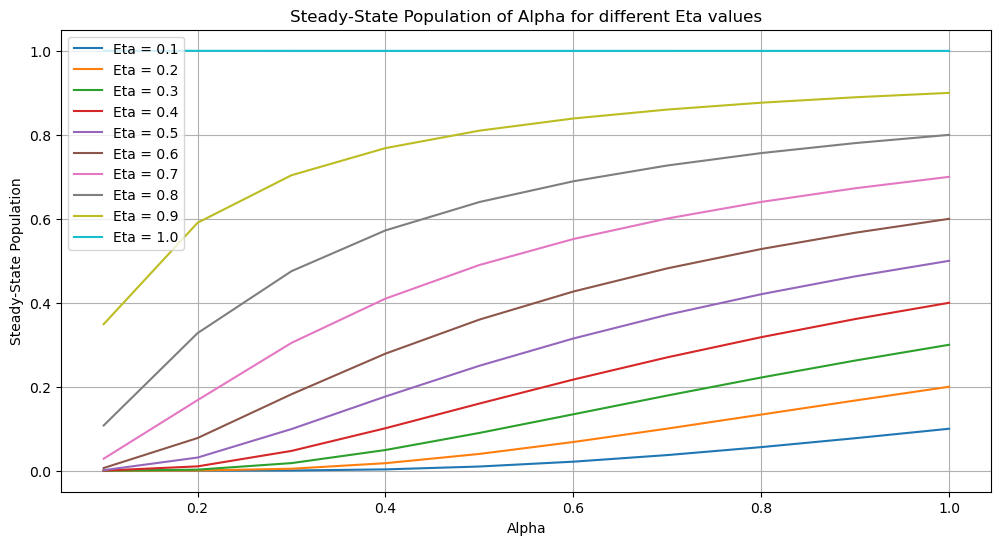

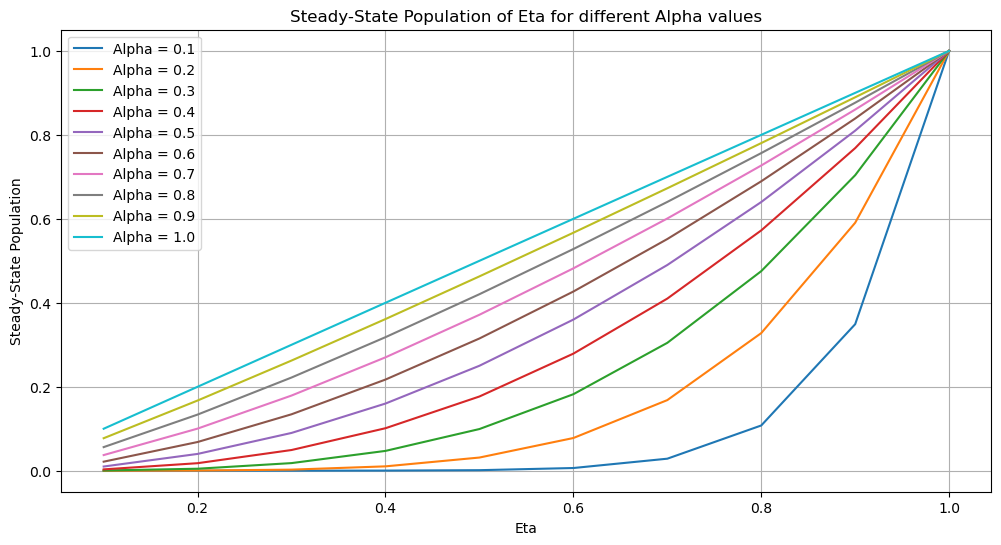

In [9]:
# Define function to compute steady state population based on alpha and eta
def simulate_population(alpha, eta, max_iterations=5000, tolerance=1e-4, initial_population=10):
    A = 1  # Technology level
    X = 1  # Land availability
    L = initial_population  # Initial population
    previous_population = L
        #same procedure as before
    for iteration in range(max_iterations):
        y = (L ** (- alpha)) * ((A * X) ** alpha)
        n = eta * y
        L_new = n * L
        
        if np.abs(L_new - previous_population) < tolerance:
            return L_new
        
        previous_population = L
        L = L_new
    
    return L_new  # Return final population if steady state is not reached within max_iterations

# Values for alpha and eta to use in individual plots
alpha_values = np.linspace(0.1, 1.0, 10)
eta_values = np.linspace(0.1, 1.0, 10)

# Steady-state population vs. Alpha for different values of Eta
plt.figure(figsize=(12, 6))
for eta in eta_values:
    populations = [simulate_population(alpha, eta) for alpha in alpha_values]
    plt.plot(alpha_values, populations, label=f'Eta = {eta:.1f}')
plt.xlabel('Alpha')
plt.ylabel('Steady-State Population')
plt.title('Steady-State Population of Alpha for different Eta values')
plt.legend()
plt.grid(True)
plt.show()

# Steady-state population vs. Eta for different values of Alpha
plt.figure(figsize=(12, 6))
for alpha in alpha_values:
    populations = [simulate_population(alpha, eta) for eta in eta_values]
    plt.plot(eta_values, populations, label=f'Alpha = {alpha:.1f}')
plt.xlabel('Eta')
plt.ylabel('Steady-State Population')
plt.title('Steady-State Population of Eta for different Alpha values')
plt.legend()
plt.grid(True)
plt.show()


From this we can see how $\alpha$ and $\eta$ affect population. We can see how they both positively affect population growth. The nature of this effect changes depending on the other parameter. Higher values of Alpha on Eta, changes Etas effect on population from increasing returns, to a linear effect, while higher values of Eta changes Alphas effect an increasing effect, to decreasing, and at the limit, an linear.

# Changes to Model

We now estimate the model with the added mortality to see if we can find a numericall solution to the model.
As there now are three variables our further analysis can also not go as deep as before.

In [10]:
# Constants
alpha = 0.5    # Output elasticity with respect to labor
eta = 0.5     # Adjusted responsiveness of population growth to output (lowered to stabilize)
A = 1          # Technology level
X = 1          # Land availability
L = 10       # Initial population
mu = 0.1    # Parameter theta

# Simulation settings
max_iterations = 5000  # Increased maximum iterations
tolerance = 1e-4       # Adjusted tolerance for practicality
previous_population = L

# Iterate to find steady state
for iteration in range(max_iterations):
    # Calculate output per person
    y = (L ** (-alpha)) * ((A * X) ** alpha)
    
    # Calculate new population based on the output
    n = eta * y
    L_new = n * L + (1 - mu) * L
    
    # Print dynamics to understand behavior
    if iteration % 1000 == 0:  # Print every 1000 iterations to monitor progress
        print(f"Iteration {iteration}: Population = {L_new}")
    
    # Check for convergence
    if abs(L_new - previous_population) < tolerance:
        print(f"Steady state reached at iteration {iteration}")
        print(f"Steady state population: {L_new}")
        break
    
    # Update the population for the next iteration
    previous_population = L
    L = L_new

# If loop completes without breaking
if iteration == max_iterations - 1:
    print("Steady state not reached within the maximum number of iterations.")

Iteration 0: Population = 10.581138830084189
Steady state reached at iteration 193
Steady state population: 24.999113068115236


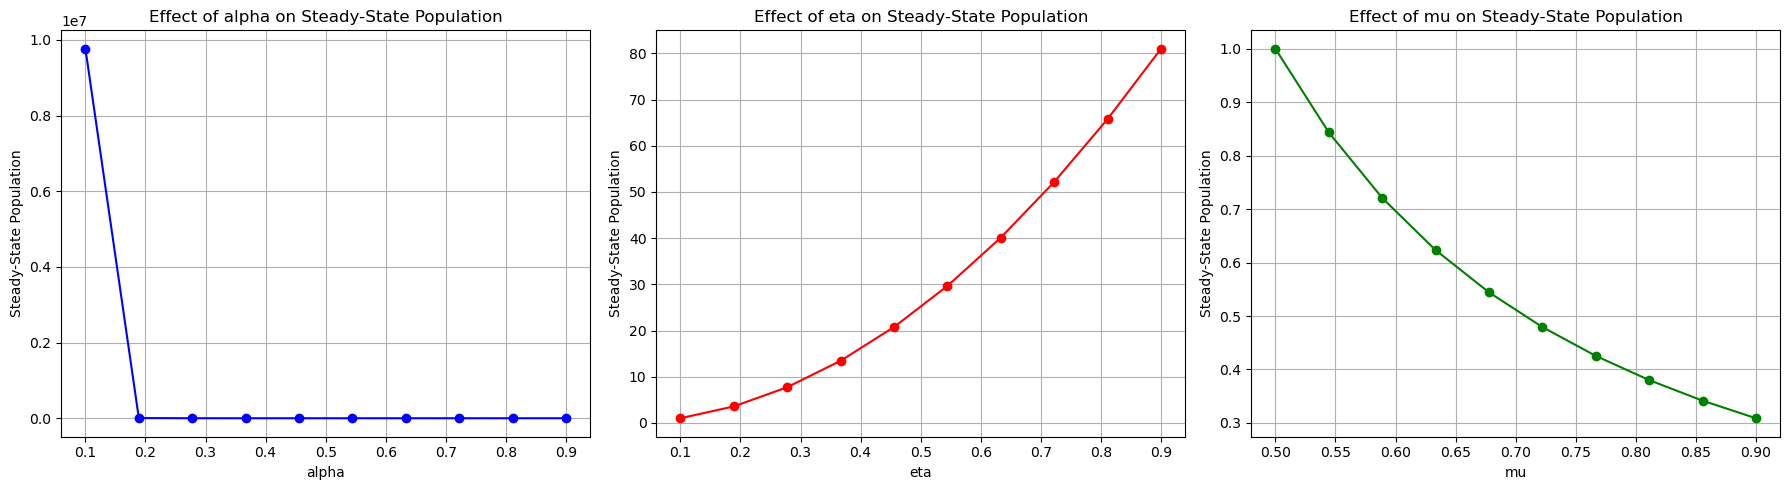

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
A = 1          # Technology level
X = 1          # Land availability
L = 10         # Initial population

# Simulation settings
max_iterations = 5000  
tolerance = 1e-4       

# Function to find steady-state population for given parameters
def find_steady_state(alpha, eta, mu):
    L = 10  # Reset initial population
    previous_population = L  # Initialize previous_population for each run

    for iteration in range(max_iterations):
        # Calculate output per person
        y = (L ** (-alpha)) * ((A * X) ** alpha)
        
        # Calculate new population based on the output
        n = eta * y
        L_new = n * L + (1 - mu) * L
        
        # Check for convergence
        if abs(L_new - previous_population) < tolerance:
            return L_new
        
        # Update the population for the next iteration
        previous_population = L
        L = L_new
    
    # If loop completes without breaking
    return None

# Generate values for parameters using linspace
alpha_values = np.linspace(0.1, 0.9, 10)
eta_values = np.linspace(0.1, 0.9, 10)
mu_values = np.linspace(0.5, 0.9, 10)

# Calculate steady-state populations for each parameter set
steady_state_populations_alpha = [find_steady_state(alpha, 0.5, 0.1) for alpha in alpha_values]
steady_state_populations_eta = [find_steady_state(0.5, eta, 0.1) for eta in eta_values]
steady_state_populations_mu = [find_steady_state(0.5, 0.5, mu) for mu in mu_values]

# Plotting
plt.figure(figsize=(18, 5))

# Plot for alpha
plt.subplot(1, 3, 1)
plt.plot(alpha_values, steady_state_populations_alpha, marker='o', linestyle='-', color='b')
plt.title('Effect of alpha on Steady-State Population')
plt.xlabel('alpha')
plt.ylabel('Steady-State Population')
plt.grid(True)

# Plot for eta
plt.subplot(1, 3, 2)
plt.plot(eta_values, steady_state_populations_eta, marker='o', linestyle='-', color='r')
plt.title('Effect of eta on Steady-State Population')
plt.xlabel('eta')
plt.ylabel('Steady-State Population')
plt.grid(True)

# Plot for mu
plt.subplot(1, 3, 3)
plt.plot(mu_values, steady_state_populations_mu, marker='o', linestyle='-', color='g')
plt.title('Effect of mu on Steady-State Population')
plt.xlabel('mu')
plt.ylabel('Steady-State Population')
plt.grid(True)

plt.tight_layout()
plt.show()


A steady state is reached, and while this steady state with mortality is paradoxically higher than before, this is because poeple live for more than one period now, at a changeable rate.

As seen for the curves showing diminishing return in the model with mortality, we can see that the alpha-parameter is in this setup will set population to 0 if it is 0.2 or above, a rather abnormal behaviour.
For eta on the other hand we can see that it behaves normal with a diminishing return to population. 
The new variable mu (mortality) is decreasing the population, which makes perfect sense.

# Conclusion

In this exercise we have investigated the dynamic malthus model and solve it both nummerically and analytically, while addding the new aspect of mortality to new. When doing this the model could still be solved nummerically, while not analytically, showing the strength of programming. In our analysis we also found how the different parameters affected both the model, and the other parameters.